In [2]:
import numpy as np
import pandas as pd
import string
import re
import pickle
import tqdm
import seaborn as sns


import nltk 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','like' 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','py','gt','lt'])
char_list = ['=', '+','-','*','<','>','/',')','(','[',']',':'] 

import gensim
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from gensim import corpora
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook



import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
from spacy.lang.en import English
parser = English()

# from nltk.corpus import wordnet as wn

from gensim.corpora import Dictionary
from pprint import pprint

import os 
mallet_path = 'C:/mallet-2.0.8/bin/mallet' # update this path

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

df_dominant_topic_final = pd.read_csv (r'Topic_modeling_result_HDL.csv',parse_dates=['AcceptedAnswerdate','creationdate'])


In [3]:
df_dominant_topic_final.ACCanswerBody.isna().sum()

0

In [4]:
df_dominant_topic_final['IsAcceptedAnswer']=df_dominant_topic_final['ACCanswerBody'].apply(lambda x:False if x == ' ' else True )

In [5]:
df_dominant_topic_final.IsAcceptedAnswer.value_counts(normalize=True)                                                          

True     0.531039
False    0.468961
Name: IsAcceptedAnswer, dtype: float64

<AxesSubplot:xlabel='Dominant_Topic', ylabel='percentage'>

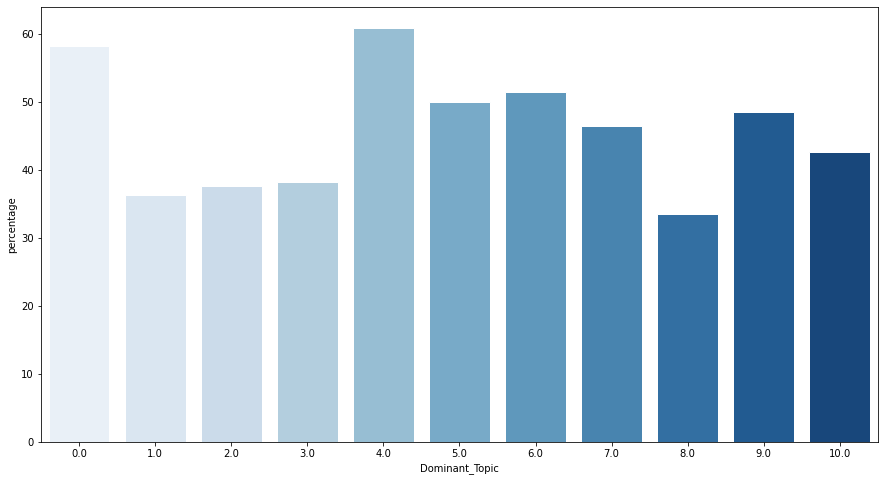

In [6]:
accepted_answers_percentage = df_dominant_topic_final.groupby(['Dominant_Topic','IsAcceptedAnswer']).size().reset_index(name='count')
# Change: groupby state_office and divide by sum
tmp_df = accepted_answers_percentage.groupby('Dominant_Topic').agg({'count': 'sum'}).reset_index()
tmp_df = pd.merge(accepted_answers_percentage , tmp_df , on='Dominant_Topic' ,how='inner')
tmp_df['percentage'] = (tmp_df['count_x']/tmp_df['count_y'])*100
accepted_answers_percentage = tmp_df[['Dominant_Topic','IsAcceptedAnswer','percentage']]
not_accepted_answer = accepted_answers_percentage[accepted_answers_percentage['IsAcceptedAnswer']==False]
not_accepted_answer.to_excel('Not accepted answer percentage per topic.xlsx',index=False)
plt.figure(figsize=(15,8))
sns.barplot(x = 'Dominant_Topic', y = 'percentage', data = not_accepted_answer,
            palette = 'Blues', edgecolor = 'w')